## **Importing the Libraries**

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd

## **Input data files are available in the read-only “…/input/” directory:**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Input/social-media-aim/social_media_aim.csv
/content/drive/My Drive/Input/instagram_fake-spammer-genuine-accounts/test.csv
/content/drive/My Drive/Input/instagram_fake-spammer-genuine-accounts/train.csv
/content/drive/My Drive/Input/social-media-test/social_media_test.csv
/content/drive/My Drive/Input/social-media-train/social_media_train.csv
/content/drive/My Drive/Input/fake_account_data_dict/fake_account__data_dict.csv


In [7]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
!pip install pdpipe


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 7.1 MB/s eta 0:00:00
  Created wheel for decore: filename=decore-0.0.1-py2.py3-none-any.whl size=4188 sha256=52a3c5c3bb0d45a8629eaeba2640676a12a67ae0c4c62728567e0d4ea01d2202
  Stored in directory: /root/.cache/pip/wheels/66/5f/86/95d99f5eceb58f56ac3abfc8106165ce0337b00f66d28b32bc
Successfully built decore


In [9]:
# Note: Make sure module pdpipe is available.
# You might need to install it via pip install pdpipe
import pdpipe as pdp
%matplotlib inline

In [10]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set max width of cell
pd.options.display.max_colwidth=300

# Suppress scientific notation
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.2f}'.format

# Display all columns
pd.set_option('display.max_columns', None)


## **Read the train dataset:**

In [11]:
# Read data
df_train = pd.read_csv("/content/drive/My Drive/Input/social-media-train/social_media_train.csv",index_col=[0])
display(df_train.head(),df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fake                   576 non-null    int64  
 1   profile_pic            576 non-null    object 
 2   ratio_numlen_username  576 non-null    float64
 3   len_fullname           576 non-null    int64  
 4   ratio_numlen_fullname  576 non-null    float64
 5   sim_name_username      576 non-null    object 
 6   len_desc               576 non-null    int64  
 7   extern_url             576 non-null    object 
 8   private                576 non-null    object 
 9   num_posts              576 non-null    int64  
 10  num_followers          576 non-null    int64  
 11  num_following          576 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 58.5+ KB


,fake,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,sim_name_username,len_desc,extern_url,private,num_posts,num_followers,num_following
0,0,Yes,0.27,0,0.00,No match,53,No,No,32,1000,955
1,0,Yes,0.00,2,0.00,Partial match,44,No,No,286,2740,533
2,0,Yes,0.10,2,0.00,Partial match,0,No,Yes,13,159,98
3,0,Yes,0.00,1,0.00,Partial match,82,No,No,679,414,651
4,0,Yes,0.00,2,0.00,No match,0,No,Yes,6,151,126


None

## **Dataset Discription:**

In [12]:
# Dataset Description
data_dict = pd.read_csv('/content/drive/My Drive/Input/fake_account_data_dict/fake_account__data_dict.csv', index_col = 'No.')
data_dict

,Column name,Data Type,Description
No.,,,
0,'profile_pic',categorical,Whether the account has a profile picture (1) or not (0)
1,'ratio_numlen_username',numerical (float),Ratio of numeric characters in the account username to its length
2,'len_fullname',numerical (int),Number of characters in the user's full name
3,'ratio_numlen_fullname',numerical (float),Ratio of numeric characters in the user's full name to its length
4,'sim_name_username',categorical,"Whether the user's name matches their username completely (1),not at all (0)."
5,'len_desc',numerical (int),Number of characters in the account description
6,'extern_url',categorical,Whether the account description includes a URL (1) or not (2)
7,'private',categorical,Whether the user's posts are visible only to their followers (1) or to all Instagram users (2).
8,'num_posts',numerical (int),Number of posts in the user account


## **Determine Categorical and Numerical Features:**

In [14]:
# Numerical columns
num_cols = ['ratio_numlen_username','len_fullname','ratio_numlen_fullname',
            'len_desc','num_posts','num_followers',
              'num_following']
# Categorical columns
cat_cols = [col for col in df_train.columns.values.tolist() if col not in num_cols]
cat_cols

['fake', 'profile_pic', 'sim_name_username', 'extern_url', 'private']

## **Check Descriptive Statistics:**

In [15]:
# Check descriptive statistics
df_train[num_cols].describe()

,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,num_posts,num_followers,num_following
count,576.00,576.00,576.00,576.00,576.00,576.00,576.00
mean,0.16,1.46,0.04,22.62,107.49,85307.24,508.38
std,0.21,1.05,0.13,37.70,402.03,910148.46,917.98
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,0.00,39.00,57.50
50%,0.00,1.00,0.00,0.00,9.00,150.50,229.50
75%,0.31,2.00,0.00,34.00,81.50,716.00,589.50
max,0.92,12.00,1.00,150.00,7389.00,15338538.00,7500.00


**Get an idea of target category share: fake:**

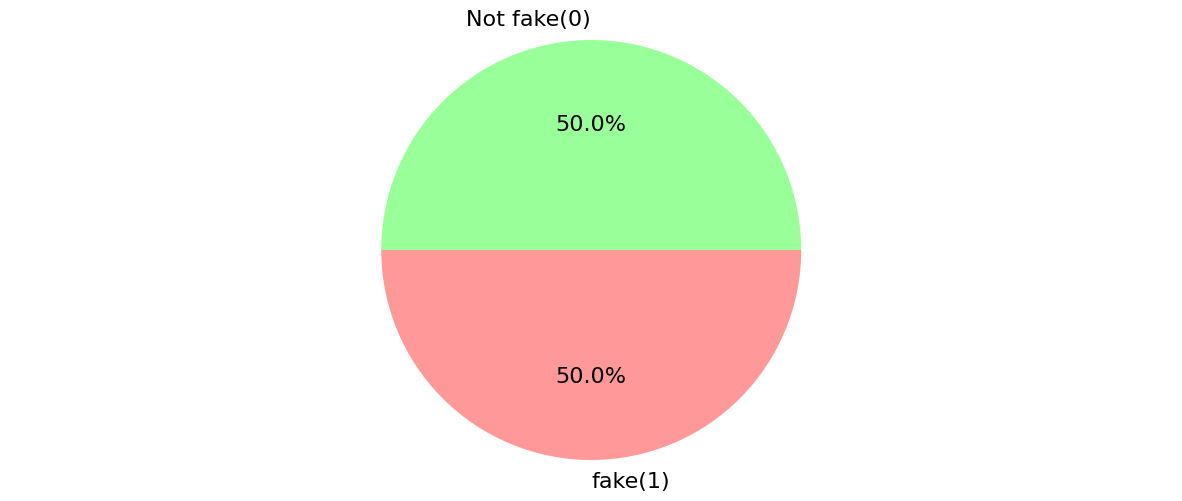

In [16]:
# Get an idea of target category share: fake
plt.figure(figsize=(15,6))
fake_share = df_train["fake"].value_counts()
mylabel=["Not fake(0)","fake(1)"]
colors = ['#99ff99','#ff9999']
plt.pie(fake_share,
        labels=mylabel,autopct="%1.1f%%",colors=colors,
        textprops={'fontsize': 16})
plt.axis("equal");

## **Check the percentage of the missing values:**

In [17]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'percent_missing (%)': percent_missing})
missing_value_df.sort_values('percent_missing (%)', ascending=False)

,percent_missing (%)
fake,0.00
profile_pic,0.00
ratio_numlen_username,0.00
len_fullname,0.00
ratio_numlen_fullname,0.00
sim_name_username,0.00
len_desc,0.00
extern_url,0.00
private,0.00
num_posts,0.00


## **Correlation Heatmap:**

In [18]:
# Correlation heatmap
# Colormap: Most negative correlations (dark-blue) to most positive correlation (dark red)
corr = df_train[num_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,num_posts,num_followers,num_following
ratio_numlen_username,1.000000,-0.225472,0.408567,-0.321170,-0.157442,-0.062785,-0.172413
len_fullname,-0.225472,1.000000,-0.094348,0.272522,0.073350,0.033225,0.094855
ratio_numlen_fullname,0.408567,-0.094348,1.000000,-0.117521,-0.057716,-0.027035,-0.067971
len_desc,-0.321170,0.272522,-0.117521,1.000000,0.144824,0.005929,0.226561
num_posts,-0.157442,0.073350,-0.057716,0.144824,1.000000,0.321385,0.098225
num_followers,-0.062785,0.033225,-0.027035,0.005929,0.321385,1.000000,-0.011066
num_following,-0.172413,0.094855,-0.067971,0.226561,0.098225,-0.011066,1.000000


## **Pair plot of numerical values with fake account information:**

Text(0.5, 0.98, 'Pair Plot of Characteristics')

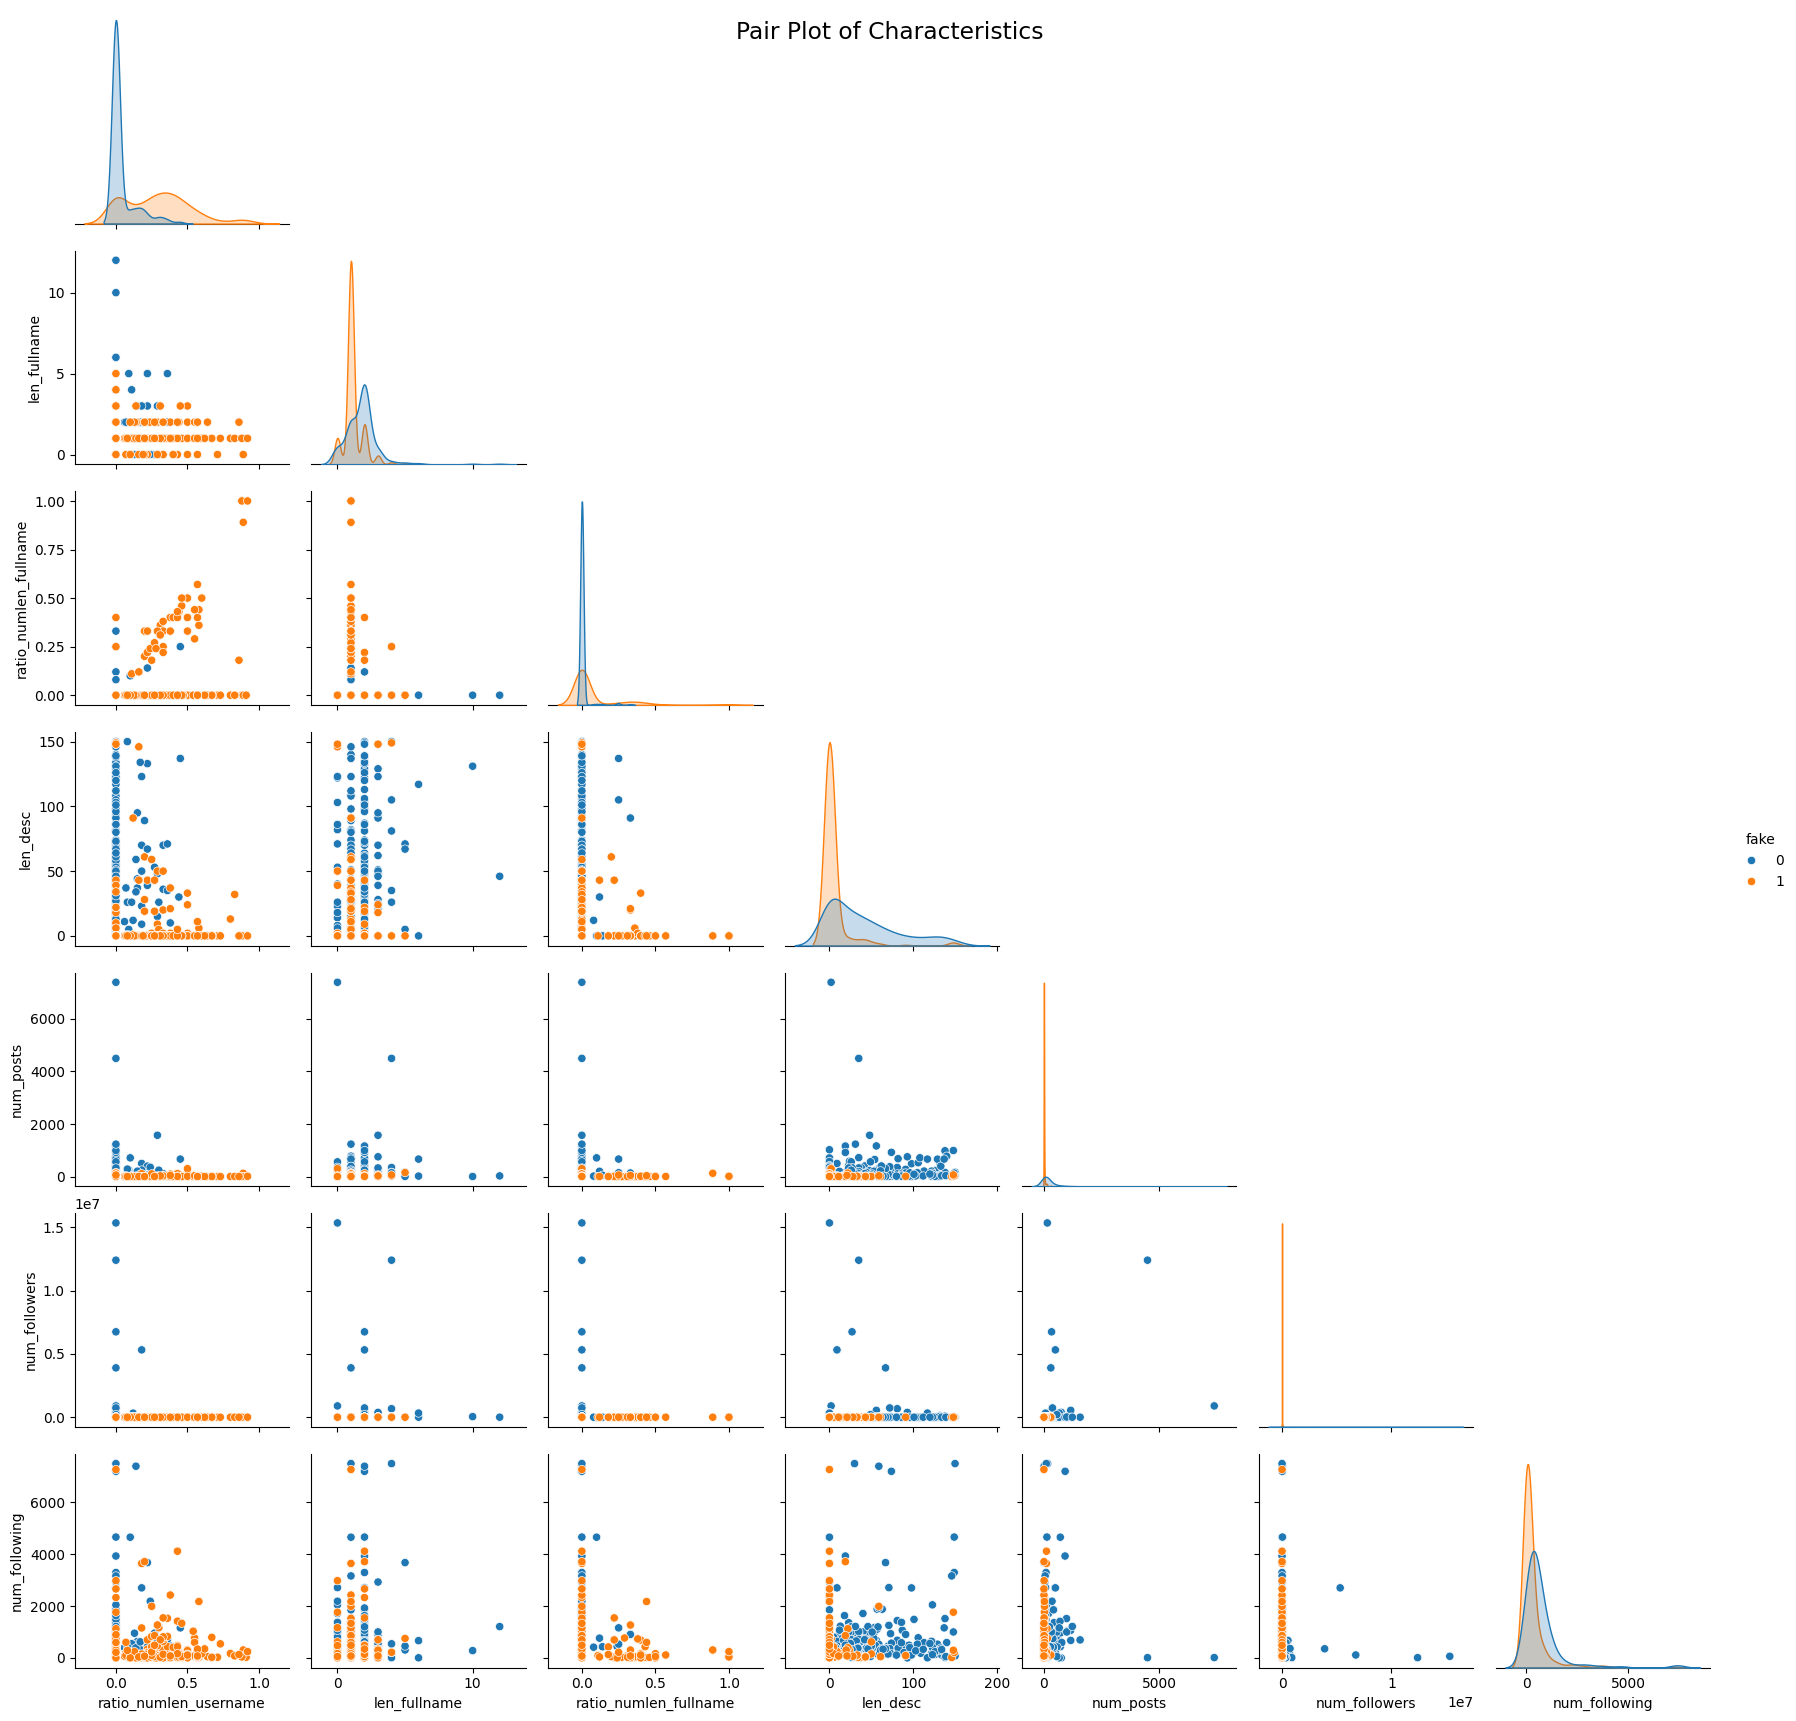

In [19]:
# Pair plot oapif numerical values with fake account information
pp_cols = []
pp_cols = num_cols + ['fake']
ax=sns.pairplot(df_train[pp_cols], hue="fake",corner=True);
plt.style.use('fivethirtyeight')
ax.fig.suptitle("Pair Plot of Characteristics")

## **Categorical data and Unique values:**

In [20]:
# Categorical data
display(df_train.loc[:, cat_cols].head())
print('----------------------')

# Unique values
for col in cat_cols:
    unique_values = df_train.loc[:, col].unique()
    print("\nColumn name: {}\nUnique values: {}".format(col, unique_values))

,fake,profile_pic,sim_name_username,extern_url,private
0,0,Yes,No match,No,No
1,0,Yes,Partial match,No,No
2,0,Yes,Partial match,No,Yes
3,0,Yes,Partial match,No,No
4,0,Yes,No match,No,Yes


----------------------

Column name: fake
Unique values: [0 1]

Column name: profile_pic
Unique values: ['Yes' 'No']

Column name: sim_name_username
Unique values: ['No match' 'Partial match' 'Full match']

Column name: extern_url
Unique values: ['No' 'Yes']

Column name: private
Unique values: ['No' 'Yes']


## **Define function label_encoding:**

In [21]:
# Define function label_encoding
def label_encoding(df):
    '''
    Function label_encoding() trnasforms categorical features
    represented by strings to binary features containing only
    0s and 1s which can be used for machine learning models.
    Input:
        DataFrame of features
    Output:
        New DataFrame with binary features
    '''
    # label encoding
    dict_label_encoding = {'Yes': 1, 'No': 0}
    df.loc[:, 'profile_pic'] = df.loc[:, 'profile_pic'].replace(dict_label_encoding)
    df.loc[:, 'extern_url'] = df.loc[:, 'extern_url'].replace(dict_label_encoding)
    df.loc[:, 'private'] = df.loc[:, 'private'].replace(dict_label_encoding)

    # one-hot encoding
    onehot = pdp.OneHotEncode(["sim_name_username"], drop_first=False)
    # fit and transform on train set
    df = onehot.fit_transform(df)
    return df

# Apply function label_encoding
df_train = label_encoding(df_train)
df_train.head()

,fake,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,extern_url,private,num_posts,num_followers,num_following,sim_name_username_Full match,sim_name_username_No match,sim_name_username_Partial match
0,0,1,0.27,0,0.00,53,0,0,32,1000,955,False,True,False
1,0,1,0.00,2,0.00,44,0,0,286,2740,533,False,False,True
2,0,1,0.10,2,0.00,0,0,1,13,159,98,False,False,True
3,0,1,0.00,1,0.00,82,0,0,679,414,651,False,False,True
4,0,1,0.00,2,0.00,0,0,1,6,151,126,False,True,False


## **Logistic Regression With and Without Regularisation**

In [22]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

###################################################################
# a) Without regularisation

# Feature matrix and target vector
features_train = df_train.iloc[:, 1:]
target_train = df_train.loc[:, 'fake']

# Model instantiation
model_log = LogisticRegression(solver='lbfgs', max_iter=10000, C=100002, random_state=42)

# Model fitting
model_log.fit(features_train, target_train)

#####################################################################
# b) With regularisation

# Standardization to adjust the features
from sklearn.preprocessing import StandardScaler

# Fit on training data and scale them
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)

# Model instantiation
model_reg = LogisticRegression(solver='lbfgs', max_iter=10000, C=0.5, random_state=42)

# Model fitting
model_reg.fit(features_train_scaled, target_train)


LogisticRegression(C=0.5, max_iter=10000, random_state=42)

## **MODEL PERFORMANCE EVALUATION**
## **Read the Test Dataset**

In [23]:
# Read data
df_test = pd.read_csv("/content/drive/My Drive/Input/social-media-test/social_media_test.csv",index_col=[0])
df_test = label_encoding(df_test)
df_test.head()

,fake,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,extern_url,private,num_posts,num_followers,num_following,sim_name_username_Full match,sim_name_username_No match,sim_name_username_Partial match
0,0,1,0.33,1,0.33,30,0,1,35,488.00,604,True,False,False
1,0,1,0.00,5,0.00,64,0,1,3,35.00,6,False,False,True
2,0,1,0.00,2,0.00,82,0,1,319,328.00,668,False,False,True
3,0,1,0.00,1,0.00,143,0,1,273,14890.00,7369,False,True,False
4,0,1,0.50,1,0.00,76,0,1,6,225.00,356,False,True,False


In [24]:
# Feature matrix and target vector
features_test = df_test.drop('fake',axis=1)
target_test = df_test['fake']

 # Without regularisation
# predict target values from model
target_test_pred_log = model_log.predict(features_test)

# model evaluation
from sklearn.metrics import precision_score, recall_score
precision_log = precision_score(target_test, target_test_pred_log)
recall_log = recall_score(target_test, target_test_pred_log)

# print
print('Precision of model without regularisation: ', precision_log)
print('Recall of model without regularisation: ', recall_log)

#####################################################################
# With regularisation
# features matrix and target vector
features_test_scaled = scaler.transform(features_test)

# predict target values from model
target_test_pred_reg = model_reg.predict(features_test_scaled)

# model evaluation
precision_reg = precision_score(target_test, target_test_pred_reg)
recall_reg = recall_score(target_test, target_test_pred_reg)

# print
print('Precision of model with regularisation: ', precision_reg)
print('Recall of model with regularisation: ', recall_reg)

Precision of model without regularisation:  0.8666666666666667
Recall of model without regularisation:  0.8666666666666667
Precision of model with regularisation:  0.8813559322033898
Recall of model with regularisation:  0.8666666666666667


## **ROC (RECEIVER OPERATING CHARACTERISTIC)**

In [25]:
# module import
from sklearn.metrics import roc_curve

# calculate roc curve values
def roc_curve_values(model,features,target):
    '''
    Function roc_curve_values estimates the probability
    and return roc_curve values as output.

    Input:
        model, feautes as dataframe, target values
    Output:
        False positive rate, recall, target_test_pred_proba
    '''
    # calculate probability
    target_test_pred_proba = model.predict_proba(features)

    # calculate roc curve values
    false_positive_rate, recall, threshold = roc_curve(target,
                                                       target_test_pred_proba[:,1],
                                                       drop_intermediate=False)

    return false_positive_rate, recall, target_test_pred_proba

In [26]:
# Apply function roc_curve_values for model without regularization
false_positive_rate_log, recall_log, target_test_pred_proba_log  = roc_curve_values(model_log,features_test,target_test)
# Apply function roc_curve_values for model with regularization
false_positive_rate_reg, recall_reg, target_test_pred_proba_reg  = roc_curve_values(model_reg,features_test,target_test)

In [27]:
def roc_curve_plot(false_positive_rate,recall,label):
    '''
    Function roc_curve_plot plots ROC
    Input:
        false_positive_rate, recall, label: model type
    Output:
        ROC plot
    '''
    plt.style.use('fivethirtyeight')
    fig,ax=plt.subplots()

    # Reference lines
    # Blue diagonal
    ax.plot([0, 1], ls = "--", label='random model')
    # Grey vertical
    ax.plot([0, 0], [1, 0], c=".7", ls='--', label='ideal model')
    # Grey horizontal
    ax.plot([1, 1], c=".7", ls='--')
    # ROC curve
    ax.plot(false_positive_rate,recall, label = label)

    # labels
    ax.set_title("Receiver Operating Characteristic")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("Recall")
    ax.legend()

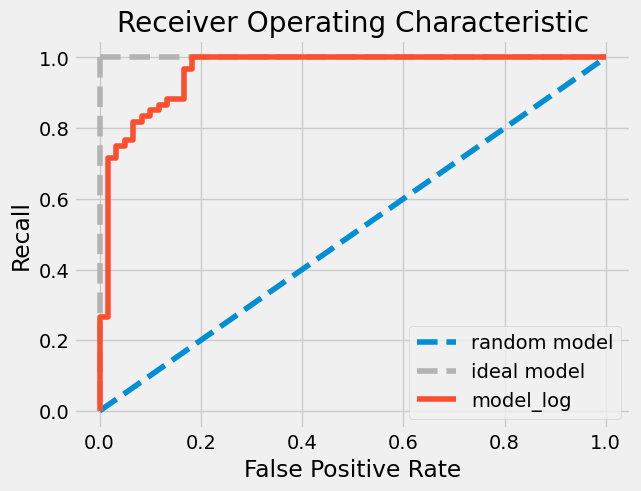

In [28]:
roc_curve_plot(false_positive_rate_log,recall_log,'model_log')

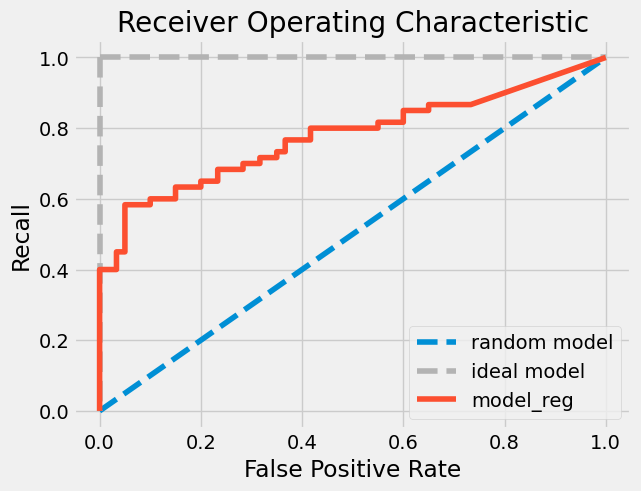

In [29]:
roc_curve_plot(false_positive_rate_reg,recall_reg,'model_reg')

## **ROC AUC(RECEIVER OPERATOR CHARACTERISTIC AREA UNDER THE CURVE) MEASURE**

In [30]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score
print('roc_auc_score for model without regularization', roc_auc_score(target_test, target_test_pred_proba_log[:, 1]))
print('##########################################################')
print('roc_auc_score for model with regularization', roc_auc_score(target_test, target_test_pred_proba_reg[:, 1]))

roc_auc_score for model without regularization 0.96
##########################################################
roc_auc_score for model with regularization 0.7763888888888889


## **FIND THE BEST LOGISTIC REGRESSION MODEL WITH GRID SEARCH AND ROC-AUC**

In [31]:
# Import regured modules
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define pipeline
pipeline_log = Pipeline([('scaler',StandardScaler()),('classifier',LogisticRegression(solver='saga',max_iter=10000, random_state=42))])
# Determine search space of hyperparameters
C_values = np.geomspace(start=0.001, stop=1000, num=14)
search_space_grid = [{'classifier__penalty': ['l1', 'l2'],'classifier__C': C_values}]
# Apply Grid Search
model_grid = GridSearchCV(estimator=pipeline_log,param_grid=search_space_grid,scoring='roc_auc',cv=5,n_jobs=-1)

# Model fitting
model_grid.fit(features_train, target_train)

# Print best estimater and score
print(model_grid.best_estimator_)
print(model_grid.best_params_)
print(model_grid.best_score_)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=np.float64(4.923882631706742),
                                    max_iter=10000, random_state=42,
                                    solver='saga'))])
{'classifier__C': np.float64(4.923882631706742), 'classifier__penalty': 'l2'}
0.9657175042242944


## **MODEL EVALUATION WITH TEST DATA**

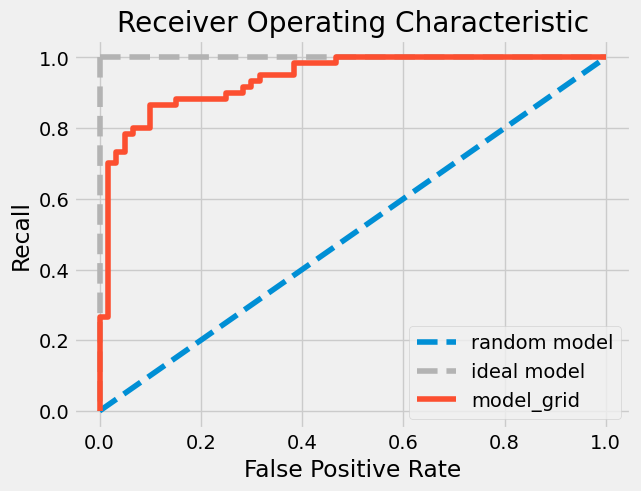

In [32]:
# Apply function roc_curve_values for model with regularization
false_positive_rate_grid, recall_grid, target_test_pred_proba  = roc_curve_values(model_grid,features_test,target_test)
roc_curve_plot(false_positive_rate_grid,recall_grid,'model_grid')

In [33]:
# Calculated roc_auc_score
target_test_pred_proba = model_grid.predict_proba(features_test)
roc_auc_score(target_test, target_test_pred_proba[:, 1])

np.float64(0.9391666666666667)

## **PREDICTION**

In [34]:
# Read data
df_aim = pd.read_csv("/content/drive/My Drive/Input/social-media-aim/social_media_aim.csv",index_col=[0])
df_aim = label_encoding(df_aim)
features_aim = df_aim.copy()

# Apply Prediction
df_aim.loc[:, 'fake_pred_proba'] = model_grid.predict_proba(features_aim)[:, 1]
df_aim.loc[:, 'fake_pred'] = model_grid.predict(features_aim)
df_aim

,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,extern_url,private,num_posts,num_followers,num_following,sim_name_username_Full match,sim_name_username_No match,sim_name_username_Partial match,fake_pred_proba,fake_pred
0,1,0.33,1,0.33,30,0,1,35,488.00,604,True,False,False,1.00,1
1,1,0.22,2,0.00,63,0,1,46,464.00,367,False,False,True,0.22,0
2,0,0.00,2,0.00,0,0,0,0,22.00,82,False,True,False,0.98,1
3,1,0.33,1,0.00,0,0,0,81,75.00,55,False,False,True,0.63,1
4,1,0.00,1,0.00,137,1,0,1065,155537.00,1395,False,True,False,0.00,0
5,1,0.27,1,0.00,0,0,0,0,45.00,64,False,False,True,0.71,1
6,0,0.44,1,0.44,112,0,0,4,415.00,1445,True,False,False,1.00,1
